<a href="https://colab.research.google.com/github/HabibaAbderrahim/Test_SOTA_2D_pose/blob/main/HOURGLASSHETAMAPMMPOSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/open-mmlab/mmpose/blob/dev-1.x/demo/MMPose_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPose Tutorial

Welcome to MMPose colab tutorial! In this tutorial, we will show you how to

- install MMPose 1.x
- perform inference with an MMPose model
- train a new mmpose model with your own datasets

Let's start!

## Install MMPose

We recommend to use a conda environment to install mmpose and its dependencies. And compilers `nvcc` and `gcc` are required.

In [1]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [2]:
# install dependencies: (if your colab has CUDA 11.8)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
# install MMEngine, MMCV and MMDetection using MIM
%pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"
!mim install "mmdet>=3.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 30.6 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 4.9 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:00


In [4]:
# for better Colab compatibility, install xtcocotools from source
%pip install git+https://github.com/jin-s13/xtcocoapi

  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-req-build-svp0sukn
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-req-build-svp0sukn
  Resolved https://github.com/jin-s13/xtcocoapi to commit d74033ff1635e9002133b2380862bc2b728584d2
  Preparing metadata (setup.py) ... done
  Created wheel for xtcocotools: filename=xtcocotools-1.14.3-cp310-cp310-linux_x86_64.whl size=379607 sha256=2e49b6dc86efc2649446919a8b81ad884aa272475df7dbceb4bd417fc594aa37
  Stored in directory: /tmp/pip-ephem-wheel-cache-sqy2u9i9/wheels/ef/1b/6b/bca3cf15bb2e536384aa0cff349cfe87a1450847473b241cf0
Successfully built xtcocotools


In [ ]:
!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

In [6]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 2.1.0+cu118 False
torchvision version: 0.16.0+cu118
mmpose version: 1.2.0
cuda version: 11.8
compiler information: GCC 9.3


##Inference

In [14]:
%cd mmpose


/content/mmpose/mmpose/mmpose/mmpose


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from mmpose.apis import MMPoseInferencer


/usr/local/lib/python3.10/dist-packages/mmengine/utils/package_utils.py:55: UserWarning: Module mmpose was already imported from /content/mmpose/mmpose/__init__.py, but /content/mmpose/mmpose/mmpose is being added to sys.path
  pkg = get_distribution(package)


###TEST INFERENCE HOURGLASS

In [17]:
img_path = '/content/drive/MyDrive/3D human pose estimation/000000000785.jpg'   # replace this with your own image path

In [18]:
inferencer = MMPoseInferencer(
    pose2d='/content/mmpose/configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hourglass52_8xb32-210e_coco-256x256.py',
    pose2d_weights='https://download.openmmlab.com/mmpose/top_down/hourglass/hourglass52_coco_256x256-4ec713ba_20200709.pth'
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hourglass/hourglass52_coco_256x256-4ec713ba_20200709.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hourglass/hourglass52_coco_256x256-4ec713ba_20200709.pth" to /root/.cache/torch/hub/checkpoints/hourglass52_coco_256x256-4ec713ba_20200709.pth


11/30 18:03:17 - mmengine - WARNING - dataset_meta are not saved in the checkpoint's meta data, load via config.
11/30 18:03:17 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.


/content/mmpose/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/content/mmpose/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth


Downloading: "https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth" to /root/.cache/torch/hub/checkpoints/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth


The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

11/30 18:03:53 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


In [24]:
# The MMPoseInferencer API employs a lazy inference approach,
# creating a prediction generator when given input
result_generator = inferencer(img_path, show=True)

In [ ]:
result = next(result_generator)

Output()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

## Inference with Hourglass

MMPose provides high-level APIs for model inference and training.

In [20]:
import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope
import numpy as np

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

try:
    from mmdet.apis import inference_detector, init_detector
    has_mmdet = True
except (ImportError, ModuleNotFoundError):
    has_mmdet = False

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

img = '/content/drive/MyDrive/3D human pose estimation/000000000785.jpg'

pose_config ='/content/mmpose/configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hourglass52_8xb32-210e_coco-256x256.py'
pose_checkpoint ='https://download.openmmlab.com/mmpose/top_down/hourglass/hourglass52_coco_256x256-4ec713ba_20200709.pth'
det_config = '/content/mmpose/demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

device = 'cpu'
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True)))


# build detector
detector = init_detector(
    det_config,
    det_checkpoint,
    device=device
)


# build pose estimator
pose_estimator = init_pose_estimator(
    pose_config,
    pose_checkpoint,
    device=device,
    cfg_options=cfg_options
)

# init visualizer
pose_estimator.cfg.visualizer.radius = 3
pose_estimator.cfg.visualizer.line_width = 1
visualizer = VISUALIZERS.build(pose_estimator.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_pose_estimator
visualizer.set_dataset_meta(pose_estimator.dataset_meta)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
11/30 18:04:54 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hourglass/hourglass52_coco_256x256-4ec713ba_20200709.pth


/content/mmpose/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/content/mmpose/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmpose.visualization.local_visualizer.PoseLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


In [21]:

def visualize_img(img_path, detector, pose_estimator, visualizer,
                  show_interval, out_file):
    """Visualize predicted keypoints (and heatmaps) of one image."""

    # predict bbox
    scope = detector.cfg.get('default_scope', 'mmdet')
    if scope is not None:
        init_default_scope(scope)
    detect_result = inference_detector(detector, img_path)
    pred_instance = detect_result.pred_instances.cpu().numpy()
    bboxes = np.concatenate(
        (pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
    bboxes = bboxes[np.logical_and(pred_instance.labels == 0,
                                   pred_instance.scores > 0.3)]
    bboxes = bboxes[nms(bboxes, 0.3)][:, :4]

    # predict keypoints
    pose_results = inference_topdown(pose_estimator, img_path, bboxes)
    data_samples = merge_data_samples(pose_results)

    # show the results
    img = mmcv.imread(img_path, channel_order='rgb')

    visualizer.add_datasample(
        'result',
        img,
        data_sample=data_samples,
        draw_gt=False,
        draw_heatmap=True,
        draw_bbox=True,
        show=False,
        wait_time=show_interval,
        out_file=out_file,
        kpt_thr=0.3)

In [22]:
visualize_img(
    img,
    detector,
    pose_estimator,
    visualizer,
    show_interval=0,
    out_file=None)

vis_result = visualizer.get_image()

11/30 18:05:07 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".


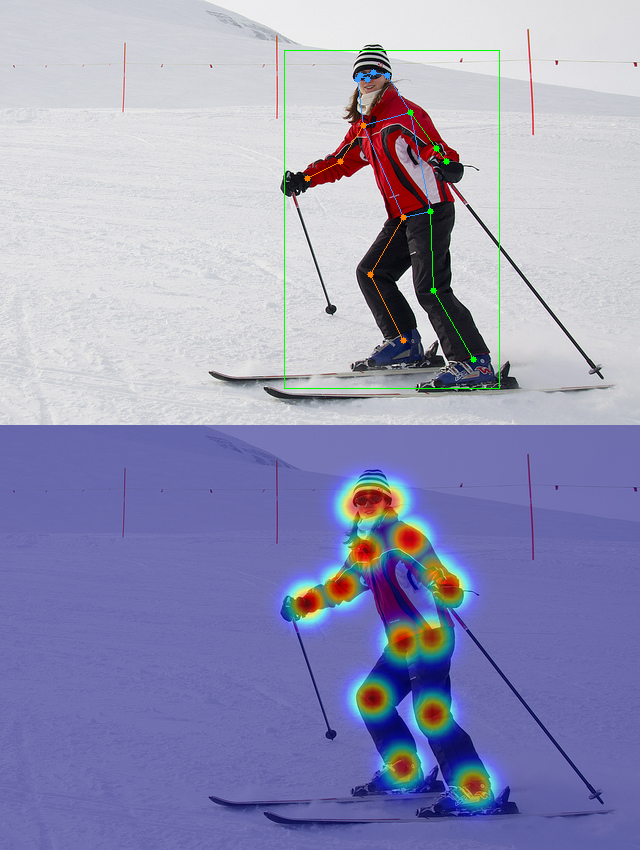

In [23]:
if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    import cv2
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result[:,:,::-1])
        display(Image(file_name))
else:
    cv2_imshow(vis_result[:,:,::-1]) #RGB2BGR to fit cv2